In [2]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from random import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
import pandas as pd
from sklearn import linear_model
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import glob
from sklearn import tree

# cleaning data-----------------------------------
def load_data(filename):
    print(filename)

    with open(filename) as file:
        reader = csv.reader(file)
        data = []
        for row in reader:
            entry = []
            for attr in row:
                entry.append(attr)
            data.append(entry)
        r_data = remove_header(data)
        print("column", len(r_data[0]))
        print("row", len(r_data))
    return r_data
#remove header--------------
def remove_header(data):
    print(data[0])
    del data[0]
    return data

In [3]:
#read data----------------------------
raw_data = []
#raw_data = load_data("./data/pandas/pandas.csv")
raw_data = load_data("./data/dataset/1.csv")

./data/dataset/1.csv
['score', 'code']
column 2
row 623


In [4]:
# predicit/empty score------------------------------------
X_submission = load_data("./data/test/test_pandas.csv")
Predict = []
true_score = []

for row in X_submission:
    entry = [row[1]]
    Predict.append(entry)
    print(Predict)
for row in X_submission:
    entry = str(row[2])
    true_score.append(entry)
    print(entry)
#print(true_score)



./data/test/test_pandas.csv
['predicted_score', 'code', 'true_score']
column 3
row 10
[['import']]
[['import'], ['      import']]
[['import'], ['      import'], ['import pandas']]
[['import'], ['      import'], ['import pandas'], ['X = []']]
[['import'], ['      import'], ['import pandas'], ['X = []'], ['X']]
[['import'], ['      import'], ['import pandas'], ['X = []'], ['X'], ['X=']]
[['import'], ['      import'], ['import pandas'], ['X = []'], ['X'], ['X='], ['Z = []']]
[['import'], ['      import'], ['import pandas'], ['X = []'], ['X'], ['X='], ['Z = []'], ['Z ']]
[['import'], ['      import'], ['import pandas'], ['X = []'], ['X'], ['X='], ['Z = []'], ['Z '], ['return']]
[['import'], ['      import'], ['import pandas'], ['X = []'], ['X'], ['X='], ['Z = []'], ['Z '], ['return'], ['return X,y']]
0
0
1
1
0
0
1
0
0
1


In [5]:
# split train data and test data from X_train----------------------------
def split_data(raw_data, splite_rate, test_rate):
    raw_train, _ = train_test_split(raw_data, test_size= 1-splite_rate)
    X = []
    y = []
    for row in raw_data:
        entry = [row[1]]
        X.append(entry)
        y.append((row[0]))
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= test_rate)
    return train_X, test_X, train_y, test_y

Train_X, TestX, Train_y ,Testy = split_data(raw_data, 0.1, 0.2)


In [6]:
#extract text from Train_X, TestX, predict-------------------------------
def extract_text(Train_X, TestX, Predict):
    Train_text = []
    for row in Train_X:
        Train_text.append(row[0])

    Test_text = []
    for row in TestX:
        Test_text.append(row[0])

    Predict_text = []
    for row in Predict:
        Predict_text.append(row[0])
    # print(Test_text)
    # combine Train and Predict Text for vectorize
    combine_text = Train_text + Test_text + Predict_text
    shuffle(combine_text)
    return Train_text, Test_text, Predict_text, combine_text

Train_text, Test_text, Predict_text,combine_text = extract_text(Train_X, TestX, Predict)



In [7]:
# vectorizing---------------------------
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english')
vectorizer.fit(combine_text)
train_vec = vectorizer.transform(Train_text)
test_vec = vectorizer.transform(Test_text)
predict_vec = vectorizer.transform(Predict_text)

In [8]:
# off-line accuracy_cal--------------------
def accuracy_cal(Predict, true_score):
    count = 0
    for i in range(len(Predict)):
        if Predict[i] == true_score[i]:
            count+=1
    print("predict: ", Predict)
    print("true_score: ", true_score)
    accuracy = round(count / len(Predict) * 100, 4)
    print("accuracy: ", accuracy, " %")
    return accuracy
    
    
# write csv file------------------------
def output_csv(filename, predict, predict_y, true_score):
    path  = filename + ".csv"
    with open(path,'a+', newline='') as file:
        csv_write = csv.writer(file)
        csv_write.writerow(["predicted_score", "code", "true_score"])
        for i in range(len(predict)):
            entry = [ predict_y[i], predict[i][0], true_score[i]]
            csv_write.writerow(entry)

In [9]:
#Logistic Regression
print("Logistic Regression")
classifier = linear_model.LogisticRegression(n_jobs=-1)
classifier.fit(train_vec, Train_y)
prediction = classifier.predict(test_vec)
#accuracy = accuracy_cal(prediction, true_score)
output_csv("perdiction_LogReg", Predict, classifier.predict(predict_vec),true_score)

Logistic Regression


In [11]:
#Naive Bayes
print("Naive Bayes")
classifier = []
prediction = []
accuracy = []

classifier = naive_bayes.MultinomialNB()
classifier.fit(train_vec, Train_y)
prediction = classifier.predict(test_vec)
#accuracy = accuracy_cal(prediction, true_score)
# csv Naive Bayes Prediction------------------
output_csv("perdiction_NaBa", Predict, classifier.predict(predict_vec),true_score)

Naive Bayes


In [12]:
#KNN
print("KNN")
classifier = []
prediction = []
accuracy = []

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(train_vec, Train_y)
prediction = classifier.predict(test_vec)
#accuracy = accuracy_cal(prediction, true_score)
output_csv("perdiction_knn", Predict, classifier.predict(predict_vec),true_score)

KNN


In [13]:
#SVM
classifier = []
prediction = []
accuracy = []

classifier = svm.SVC()
classifier.fit(train_vec, Train_y)
prediction = classifier.predict(test_vec)
#accuracy = accuracy_cal(prediction, true_score)
output_csv("perdiction_SVM", Predict, classifier.predict(predict_vec),true_score)


In [14]:
#Decison Tree
classifier = []
prediction = []
accuracy = []

classifier = tree.DecisionTreeClassifier()
classifier.fit(train_vec, Train_y)
prediction = classifier.predict(test_vec)
#accuracy = accuracy_cal(prediction, true_score)
output_csv("perdiction_DecTree", Predict, classifier.predict(predict_vec),true_score)


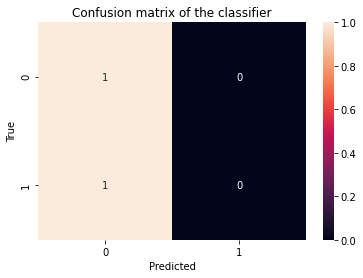

In [ ]:
# Plot a confusion matrix
cm = confusion_matrix(Testy, prediction, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()